# Problem statement: 

Dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing, use bank_full.csv


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn import * 

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/bank-full.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
target = "y"

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


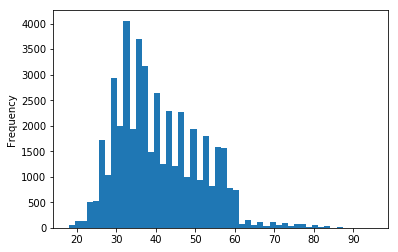

In [5]:
df.age.plot.hist(bins = 50)

In [6]:
df["age_group"] = np.where(df.age > 60, "Senior", "Non-senior")

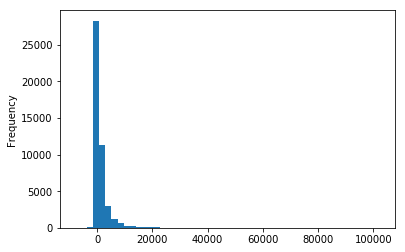

In [7]:
df.balance.plot.hist(bins = 50)

In [8]:
idx = df[df.balance <= 0].index
df["blacklist"] = "No"
df.loc[idx, "balance"] = 0.1
df.loc[idx, "blacklist"] = "Yes" 

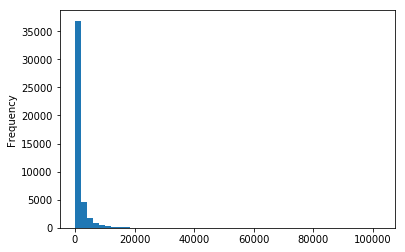

In [9]:
df.balance.plot.hist(bins = 50)

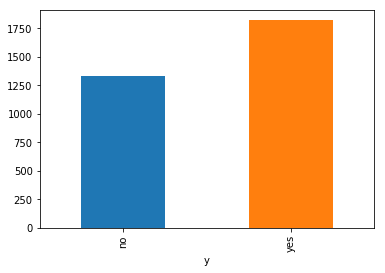

In [10]:
df.groupby("y").balance.mean().plot.bar()

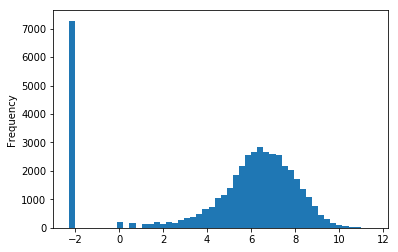

In [11]:
pd.Series(np.log(df.balance)).plot.hist(bins = 50)

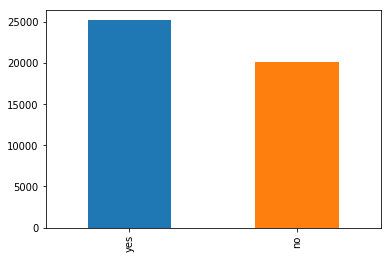

In [12]:
df.housing.value_counts().plot.bar()

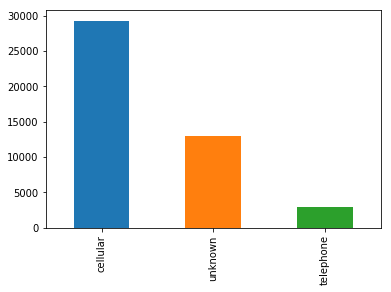

In [13]:
df.contact.value_counts().plot.bar()

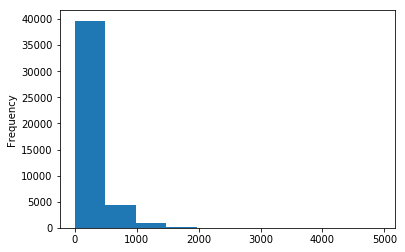

In [14]:
df.duration.plot.hist()

In [15]:
df["duration_long"] = np.where(df.duration > 60, "high", "normal")

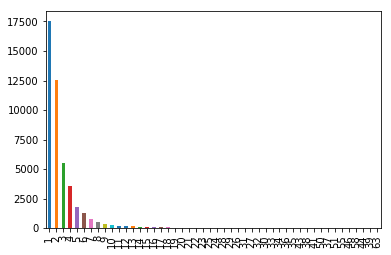

In [16]:
df.campaign.value_counts().plot.bar()

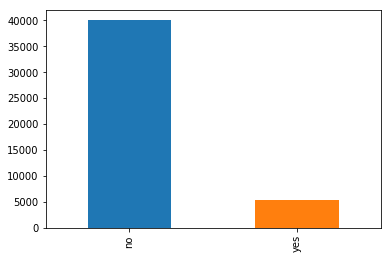

In [19]:
df[target].value_counts().plot.bar()

In [20]:
df[target].value_counts() / df.shape[0]

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,blacklist,duration_long
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Non-senior,No,high
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Non-senior,No,high
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Non-senior,No,high
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Non-senior,No,high
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no,Non-senior,No,high


In [22]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df[target])
X = df.copy()
del X[target]

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Accuracy: 0.9009879091713359


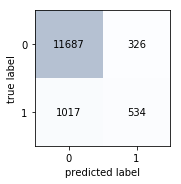

In [28]:
y_test_pred = pipe.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred));

In [29]:
pd.Series(y_test).value_counts()

0    12013
1     1551
dtype: int64

In [30]:
y_test_prob.shape, y_test.shape

((13564,), (13564,))

Text(0,0.5,'TPR')

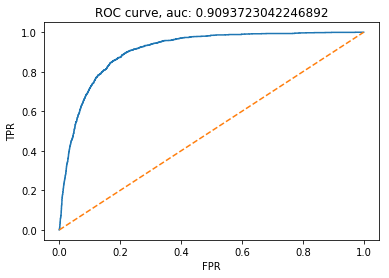

In [31]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls = "--")
auc = metrics.auc(fpr, tpr)
plt.title("ROC curve, auc: " + str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")

In [32]:
param_grid = {
    "est__C": 10 ** np.linspace(-2, 2, 5) 
}

grid = model_selection.GridSearchCV(pipe, param_grid, cv = 5,                           
        verbose = True, scoring = "accuracy")
grid.fit(X_train, y_train)
auc = metrics.accuracy_score(y_test, 
                grid.best_estimator_.predict(X_test))
print("Accuracy score for testing dataset", auc)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   13.0s finished


Accuracy score for testing dataset 0.9009879091713359
